# Data Cleaning
In this section, we will read the data from the csv file and store it in a pandas dataframe. Thereafter we will perform some basic data exploration to get rid of any missing values, useless columns and outliers.

In [1]:
# import all
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dtale
import sklearn as sk


# Read the data Train on me
dataframe= pd.read_csv('Train.csv')


### Let's start with Y and x~5
Here I'm trying to interpret the data visually. X_5  column is zeroes regardless of the output. Also we we do know exactly how many unique values there are in each column. I'm going to try to find out how many unique values there are in each column. Also I am trying to find the dimensionality of each data 

In [2]:
# Find the dimensionality of the y variable
dataframe['y'].value_counts()

Dragspel       559
Nyckelharpa    231
Serpent        210
Name: y, dtype: int64

### Cleaning zero-values from the data
I found that the data had some missing values. They are now fixed in the y column and x_5 column. I also found that the x_5 column was useless. It was all zeroes. I removed it from the dataframe.

In [3]:
# Drop the entire x5 column
#dataframe.drop('x5', axis=1, inplace=True)

# visualize the data
dtale.show(dataframe)


C:\Users\rakin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\dtale\views.py:755: FutureWarning:

['x6', 'x11', 'x12'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.



In [4]:
# Checking x1 variable for outliers and missing values

# How many unique values are there in x1 and non values
dataframe['x1'].value_counts()
dataframe['x1'].isnull().sum()

# Find in column x1 where we get '?' and replace it with NaN
dataframe['x1'].replace('?', np.nan, inplace=True)

# Find the outliers
dataframe['x1'].describe()


count         999
unique        998
top       1.29336
freq            2
Name: x1, dtype: object

In [5]:
# Clean X2
dataframe['x2'].value_counts()
dataframe['x2'].isnull().sum()
dataframe['x2'].replace('?', np.nan, inplace=True)

# Clean all zeroes in x3,x4,x7,x8,x9,x10,x12,x13
dataframe['x3'].replace(0, np.nan, inplace=True)
dataframe['x4'].replace(0, np.nan, inplace=True)
dataframe['x7'].replace(0, np.nan, inplace=True)
dataframe['x8'].replace(0, np.nan, inplace=True)
dataframe['x9'].replace(0, np.nan, inplace=True)
dataframe['x10'].replace(0, np.nan, inplace=True)
dataframe['x12'].replace(0, np.nan, inplace=True)
dataframe['x13'].replace(0, np.nan, inplace=True)

In [6]:
# Looking for missspelled values in x6
dataframe['x6'].value_counts()

Slussen              296
Entrée               152
Brinnelvägen 8       125
Lindstedsvägen 24     73
KTH Biblioteket       66
Östra stationen       57
Ostra stationen        1
Name: x6, dtype: int64

In [7]:
# Where it says "Ostra stationen" in column x6, replace it with "Ostra station"
dataframe['x6'].replace('Ostra stationen', 'Östra stationen', inplace=True)
dataframe['x6'].value_counts()


Slussen              296
Entrée               152
Brinnelvägen 8       125
Lindstedsvägen 24     73
KTH Biblioteket       66
Östra stationen       58
Name: x6, dtype: int64

### Fixing Data Type conversions 
Let's use one-hot encoding to convert the categorical data into numerical data. I also found that the data had some missing values. They are now fixed in the y column and x_5 column. I also found that the x_5 column was useless. It was all zeroes. I removed it from the dataframe.

In [8]:
# One hot encoding of x6
num_dataframe = pd.get_dummies(dataframe, columns=['x11'])    
num_dataframe = pd.get_dummies(dataframe, columns=['x12'])
num_dataframe = pd.get_dummies(dataframe, columns=['x6'])

num_dataframe['x11'] = num_dataframe['x11'].str.lower().astype('bool')
num_dataframe['x12'] = num_dataframe['x12'].str.lower().astype('bool')

num_dataframe.dtypes


y                        object
x1                       object
x2                      float64
x3                      float64
x4                      float64
x5                      float64
x7                      float64
x8                      float64
x9                      float64
x10                     float64
x11                        bool
x12                        bool
x13                     float64
x6_Brinnelvägen 8         uint8
x6_Entrée                 uint8
x6_KTH Biblioteket        uint8
x6_Lindstedsvägen 24      uint8
x6_Slussen                uint8
x6_Östra stationen        uint8
dtype: object

# Data Exploration and Visualization
In this section, we will explore the data and try to find some interesting patterns. We will also try to visualize the data to get a better understanding of the data.

## Finding correlations between the data

### Correlation between the data
Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here

C:\Users\rakin\AppData\Local\Temp\ipykernel_3692\256523109.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\rakin\AppData\Local\Temp\ipykernel_3692\256523109.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

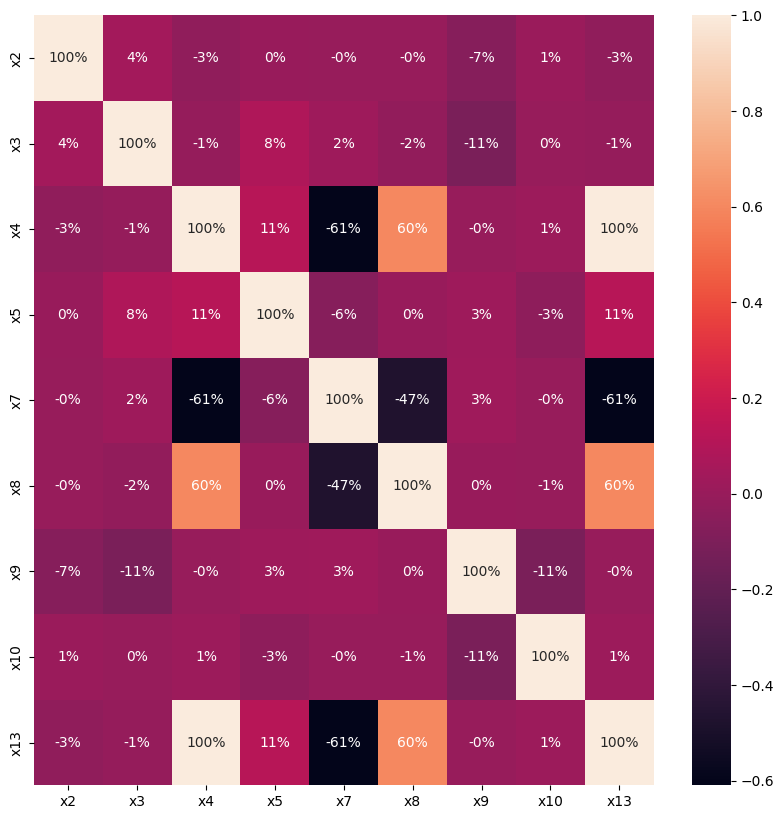

In [9]:
# Do a correlation matrix
dataframe.corr()

# Plotting the heat map
plt.figure(figsize=(10,10))
sns.heatmap(dataframe.corr(), annot=True, fmt='.0%')

C:\Users\rakin\AppData\Local\Temp\ipykernel_3692\3342645516.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\rakin\AppData\Local\Temp\ipykernel_3692\3342645516.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

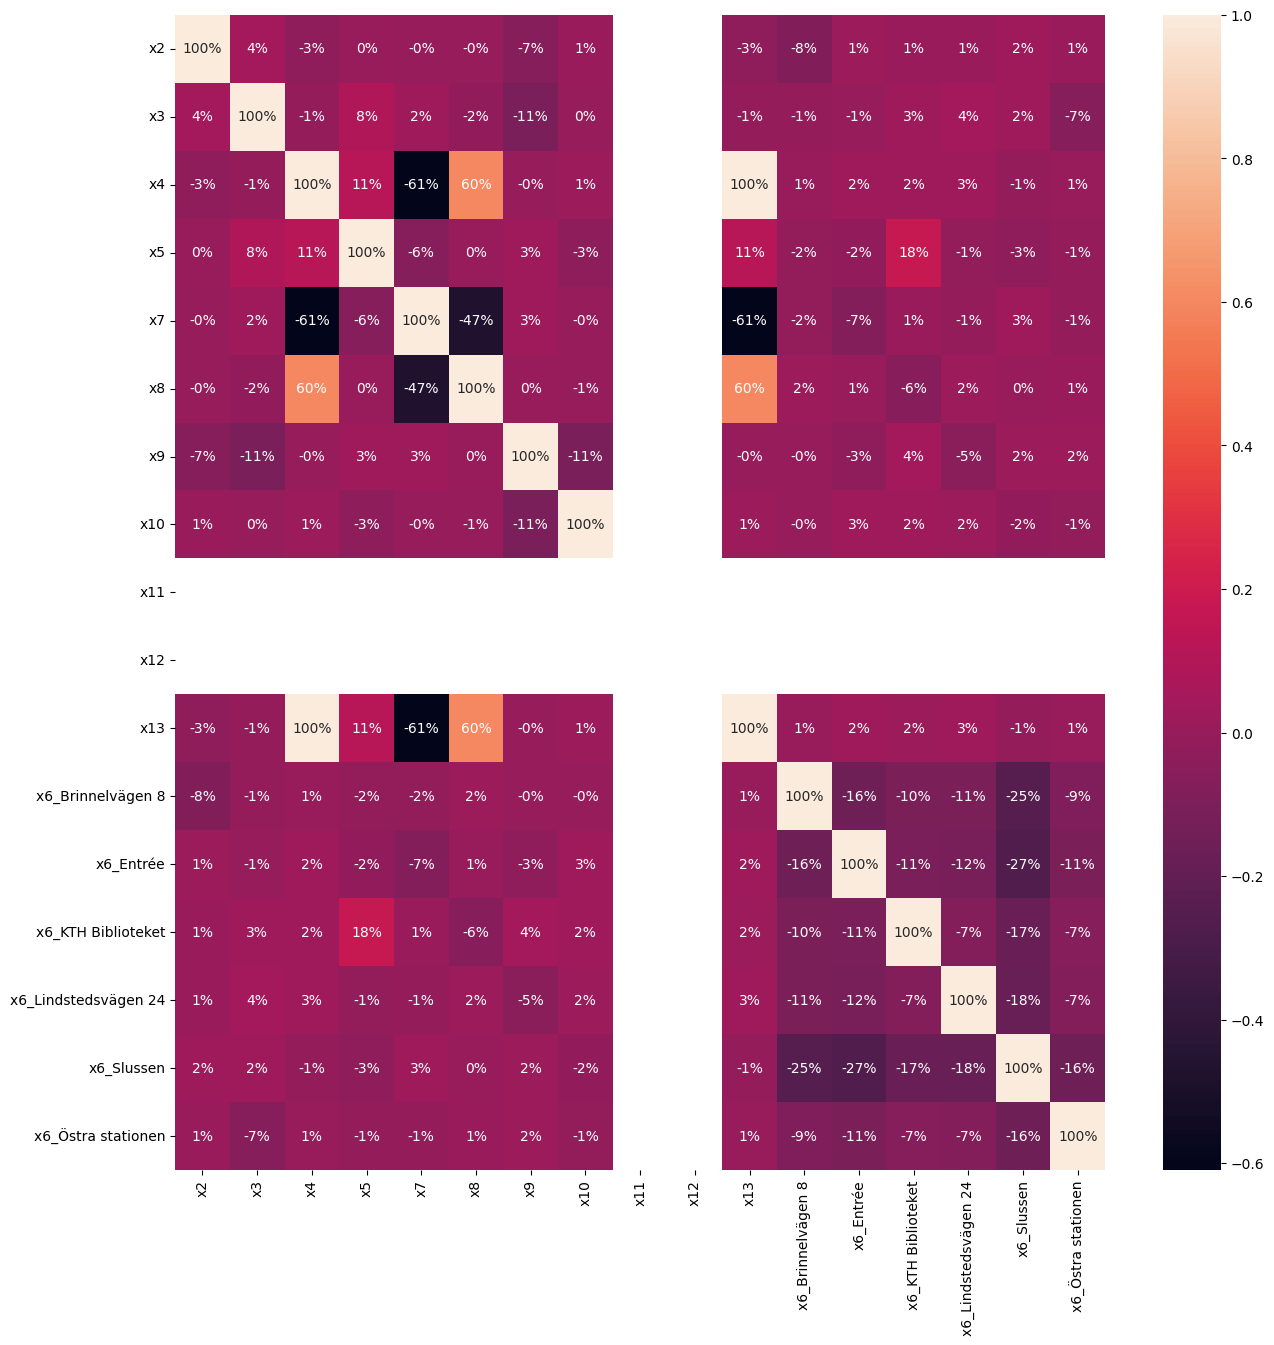

In [17]:
# Do a correlation matrix
num_dataframe.corr()

# Plotting the heat map
plt.figure(figsize=(15, 15))
sns.heatmap(num_dataframe.corr(), annot=True, fmt='.0%')


### Let's try a decision tree
There seems to be a lot of correlation between the data. Let's try to use a decision tree to see if we can get a better result. First let's remove the 

In [11]:
# Remove all the Nan values
non_NA_num_dataframe = num_dataframe.dropna()

In [18]:
## Do a decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into train and test
X = non_NA_num_dataframe.drop('y', axis=1)
y = non_NA_num_dataframe['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create a decision tree
tree = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=10)
tree.fit(X_train, y_train)

# Predict the test set
y_pred = tree.predict(X_test)

# Do n-fold cross validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 67.16 %
Standard Deviation: 2.47 %
